In [2]:
%run main.ipynb

0    1775
1     104
Name: fraud, dtype: int64
0    0.944651
1    0.055349
Name: fraud, dtype: float64


In [2]:
# Table for training results
result_table = pd.DataFrame(columns=["Model", "Data Preparation", "Feature Count", "Features", 
                                     "Optimal Parameters", "Monetary Value Per Instance - Mean", 
                                     "Monetary Value Per Instance - Standard Deviation", 
                                     "Time needed", "Raw Model"])

In [3]:
from itertools import chain
def get_dict_concat(d1, d2):
    return dict(chain.from_iterable(d.items() for d in (d1, d2)))

# Model factory -> only KNeighborsClassifier for in-depth analysis

In [4]:
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors.classification import KNeighborsClassifier

from sklearn.pipeline import make_pipeline

skf = StratifiedKFold(n_splits=10)

# model = {'model': BaggingClassifier,
#          'kwargs': 
#              {'base_estimator': DecisionTreeClassifier(),
              
              
#              },
#          'parameters': {
#              'name__base_estimator__max_leaf_nodes': [5,10,20,30]
#          }}
# pipeline = Pipeline([('name', model['model'](**model['kwargs']))])
# cv_model = GridSearchCV(pipeline, param_grid=model['parameters'], cv=cv, scoring=scorer)


param_bagging = {
    #     'bootstrap': [True, False],
#     'bootstrap_features': [True, False],    
    'n_estimators': range(10, 100, 10),
    #     'warm_start': [True, False],
    'oob_score': [True, False],
}

param_dt = {
    'base_estimator__max_leaf_nodes': [5,10,20,30]
}

param_knn = {
    'base_estimator__n_neighbors' : [15],
    'base_estimator__weights' : ['distance'],
    'base_estimator__p' : [1]
}

param_logistics = {
    'base_estimator__solver' : ['newton-cg', 'lbfgs', 'liblinear'], 
    'base_estimator__C' : np.arange(0.1, 2.0, 0.1)
}


model_tuning_factory = [
#     GridSearchCV(BaggingClassifier(DecisionTreeClassifier()),
#                  param_grid = get_dict_concat(param_bagging, param_dt), 
#                  cv = skf,
#                  scoring = my_custom_score,
#                  n_jobs = 4
#                  ),
        
#     GridSearchCV(BaggingClassifier(LogisticRegression()),
#                  param_grid = get_dict_concat(param_bagging, param_logistics), 
#                  cv = skf,
#                  scoring = my_custom_score,
#                  n_jobs = 4
#                  ),
    
    GridSearchCV(BaggingClassifier(KNeighborsClassifier()),
                 param_grid = get_dict_concat(param_bagging, param_knn), 
                 cv = skf,
                 scoring = my_custom_score,
                 n_jobs = 4
                 )
]           
                 

# iterations = 10                 
               
# model_tuning_factory_randomized = [
#     RandomizedSearchCV(BaggingClassifier(), 
#                  dict(n_estimators = range(1,150)),
#                  cv = skf,
#                  scoring = my_custom_score,
#                  n_iter = iterations)
# ]

In [5]:
run()

Finished BaggingClassifier with No Scaling and 1 features after 26.91 seconds
Finished BaggingClassifier with No Scaling and 2 features after 23.5 seconds
Finished BaggingClassifier with No Scaling and 3 features after 23.51 seconds
Finished BaggingClassifier with No Scaling and 4 features after 27.31 seconds
Finished BaggingClassifier with No Scaling and 5 features after 25.91 seconds
Finished BaggingClassifier with No Scaling and 6 features after 31.71 seconds
Finished BaggingClassifier with No Scaling and 7 features after 33.05 seconds
Finished BaggingClassifier with No Scaling and 8 features after 35.32 seconds
Finished BaggingClassifier with No Scaling and 9 features after 43.26 seconds
Finished BaggingClassifier with No Scaling and 10 features after 51.06 seconds


KeyboardInterrupt: 

In [ ]:
result_table = result_table.sort_values(by = "Monetary Value Per Instance - Mean", ascending = False)
result_table.index = range(0,result_table.shape[0])
result_table

In [ ]:
pickle_it()

In [3]:
result_table = from_pickle('result_table_BaggingClassifier') 
result_table

,Model,Data Preparation,Feature Count,Features,Optimal Parameters,Monetary Value Per Instance - Mean,Monetary Value Per Instance - Standard Deviation,Time needed,Raw Model,Feature Selection Technique
0,BaggingClassifier,LogScaler,6,"[trustLevel, lineItemVoidsPerPosition, scanned...","{'base_estimator__n_neighbors': 15, 'base_esti...",-0.149015,0.248119,NaN,"(KNeighborsClassifier(algorithm='auto', leaf_s...",SelectKBest
1,BaggingClassifier,LogScaler,5,"[trustLevel, lineItemVoidsPerPosition, scanned...","{'base_estimator__n_neighbors': 15, 'base_esti...",-0.170303,0.249043,NaN,"(KNeighborsClassifier(algorithm='auto', leaf_s...",SelectKBest
2,BaggingClassifier,LogScaler,4,"[trustLevel, scannedLineItems, pricePerScanned...","{'base_estimator__n_neighbors': 15, 'base_esti...",-0.199574,0.281659,NaN,"(KNeighborsClassifier(algorithm='auto', leaf_s...",SelectKBest
3,BaggingClassifier,LogScaler,3,"[trustLevel, scannedLineItems, pricePerScanned...","{'base_estimator__n_neighbors': 15, 'base_esti...",-0.234167,0.302677,NaN,"(KNeighborsClassifier(algorithm='auto', leaf_s...",SelectKBest
4,BaggingClassifier,No Scaling,3,"[trustLevel, totalScanTimeInSeconds, scannedLi...","{'base_estimator__n_neighbors': 15, 'base_esti...",-0.260777,0.022935,NaN,"(KNeighborsClassifier(algorithm='auto', leaf_s...",SelectKBest
5,BaggingClassifier,MinMaxScaler,3,"[trustLevel, totalScanTimeInSeconds, scannedLi...","{'base_estimator__n_neighbors': 15, 'base_esti...",-0.260777,0.027937,NaN,"(KNeighborsClassifier(algorithm='auto', leaf_s...",SelectKBest
6,BaggingClassifier,MinMaxScaler,6,"[trustLevel, totalScanTimeInSeconds, scannedLi...","{'base_estimator__n_neighbors': 15, 'base_esti...",-0.266099,0.028148,NaN,"(KNeighborsClassifier(algorithm='auto', leaf_s...",SelectKBest
7,BaggingClassifier,MinMaxScaler,4,"[trustLevel, totalScanTimeInSeconds, scannedLi...","{'base_estimator__n_neighbors': 15, 'base_esti...",-0.266099,0.028148,NaN,"(KNeighborsClassifier(algorithm='auto', leaf_s...",SelectKBest
8,BaggingClassifier,No Scaling,6,"[trustLevel, totalScanTimeInSeconds, scannedLi...","{'base_estimator__n_neighbors': 15, 'base_esti...",-0.266099,0.028148,NaN,"(KNeighborsClassifier(algorithm='auto', leaf_s...",SelectKBest
9,BaggingClassifier,MinMaxScaler,5,"[trustLevel, totalScanTimeInSeconds, scannedLi...","{'base_estimator__n_neighbors': 15, 'base_esti...",-0.271421,0.022205,NaN,"(KNeighborsClassifier(algorithm='auto', leaf_s...",SelectKBest


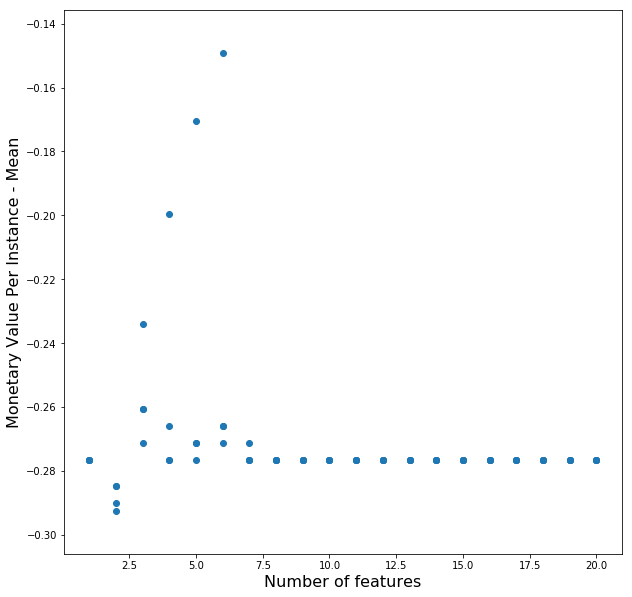

In [5]:
plot_number_features(result_table)

# Print performance of best 10 models

In [4]:
for rank in range(0,11):
    best = BestModel(rank)
    monetary_value = get_monetary_value(best)
    print()
    best.print_best_model()
    print("-----------------------------------------------------------------------------------------------")

True negative:  1775
False positive:  0
False negative:  0
True positive:  104
520 for  1879  instances in the test set
0.2767429483767962  per instance in the test set

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=1,
           weights='distance'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=70, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
['trustLevel' 'lineItemVoidsPerPosition' 'scannedLineItems'
 'pricePerScannedLineItem' 'scansWithoutRegistrationPerScannedLineItem'
 'quantityModificationsPerScannedLineItem']
-----------------------------------------------------------------------------------------------
True negative:  1775
False positive:  0
False negative:  1
True positive:  103
510 for  1879  instances in the test set
0.27142096860031933  per instance in the t